# Kamień milowy 1(Eksploracja danych)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

EDA of Congressional voting dataset taken from https://www.apispreadsheets.com/datasets/121.  
### Describtion of dataset:  
This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA in 1986. The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to y), voted against, paired against, and announced against (these three simplified to n), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition noted in the dataset as ?).

In [40]:
congressional_voting_df = pd.read_csv("congressional_voting_dataset.csv")
congressional_voting_df.head() # wypisanie pierwszych elementów tabeli

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat


In [41]:
congressional_voting_df.describe() # w każdej kolumnie mamy 3 wartości: y, n, ?. 
# Wyjątkiem jest ostatnia kolumna 'political_party', która przyjmuje wartość, albo 'democrat', albo 'republican'. 

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
top,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y,democrat
freq,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269,267


In [42]:
congressional_voting_df.info() # wszędzie są zmienne kategoryczne
# braki danych też są(? == null, co wynika z opisu danych)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   handicapped_infants                     435 non-null    object
 1   water_project_cost_sharing              435 non-null    object
 2   adoption_of_the_budget_resolution       435 non-null    object
 3   physician_fee_freeze                    435 non-null    object
 4   el_salvador_aid                         435 non-null    object
 5   religious_groups_in_schools             435 non-null    object
 6   anti_satellite_test_ban                 435 non-null    object
 7   aid_to_nicaraguan_contras               435 non-null    object
 8   mx_missile                              435 non-null    object
 9   immigration                             435 non-null    object
 10  synfuels_corporation_cutback            435 non-null    object
 11  educat

In [43]:
map = {"y": 1, "n" : 0, "?": np.nan}

df = congressional_voting_df.copy()

columns = df.drop("political_party", axis=1).columns.to_list()
for column in columns:
    df[column] = df[column].map(map)
    
df.info() # zamiana wartości w kolumnach: 
# y -> 1; n -> 0; ? -> nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped_infants                     423 non-null    float64
 1   water_project_cost_sharing              387 non-null    float64
 2   adoption_of_the_budget_resolution       424 non-null    float64
 3   physician_fee_freeze                    424 non-null    float64
 4   el_salvador_aid                         420 non-null    float64
 5   religious_groups_in_schools             424 non-null    float64
 6   anti_satellite_test_ban                 421 non-null    float64
 7   aid_to_nicaraguan_contras               420 non-null    float64
 8   mx_missile                              413 non-null    float64
 9   immigration                             428 non-null    float64
 10  synfuels_corporation_cutback            414 non-null    float6

In [44]:
df.dropna().shape # nie da się po prostu wyrzucić wszystkie obserwacje, gdzie czegoś brakuje
# bo tracimy przez to dużo danych
# więc warto próbować je uzupełniać

(232, 17)

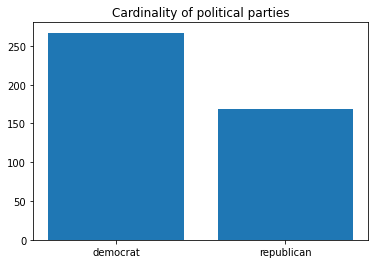

In [45]:
# Jak wygląda rozkład członków w Kongresie. 
political_parties = congressional_voting_df.groupby("political_party").size().reset_index(name='members')
plt.bar(political_parties["political_party"], height=political_parties["members"])
plt.title("Cardinality of political parties")
plt.show()
# dane są zrównoważone

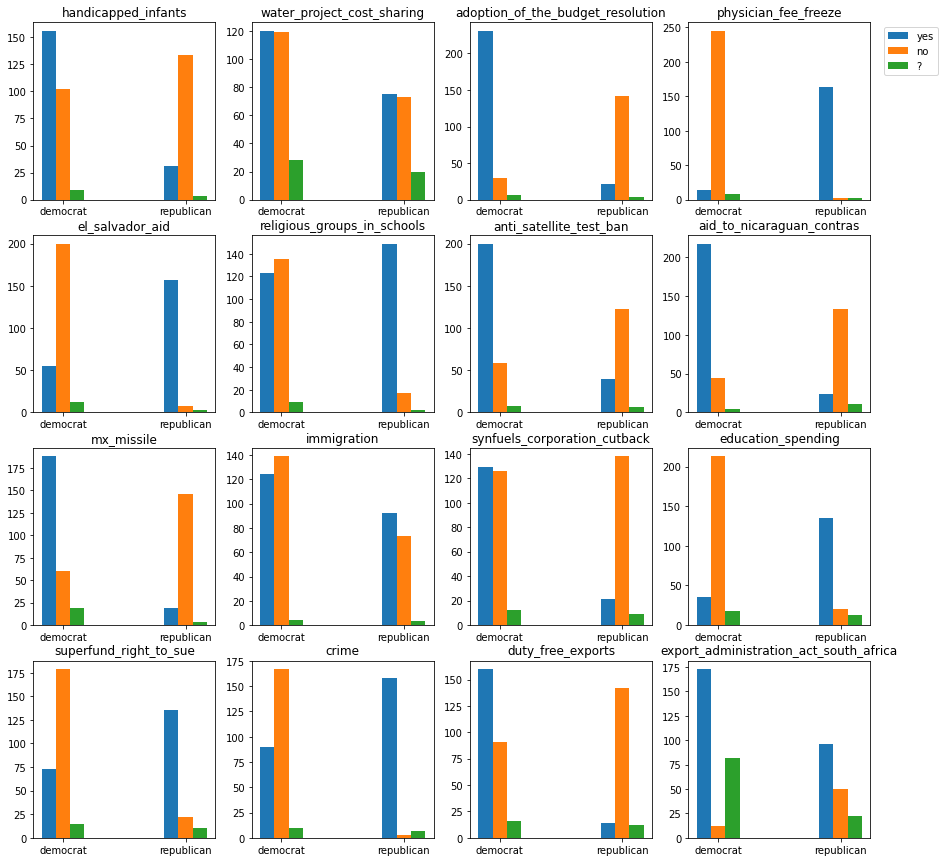

In [46]:
column_names = congressional_voting_df.columns.to_list()
columns = 4
rows = 4
labels = ["democrat", "republican"]
fig, ax_array = plt.subplots(rows, columns,squeeze=False, figsize=(15,15))
x = np.arange(2)
width = 0.35

for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
#         print(4*i+j)
        
        column = column_names[4*i+j]
        df = congressional_voting_df.groupby(["political_party", column]).size().reset_index(name="num")
        df = df.pivot(columns=column, index="political_party", values="num")

        axes.bar(x - width/3, df["y"], width/3, label = "yes")
        axes.bar(x, df["n"], width/3, label = "no")
        axes.bar(x + width/3, df["?"], width/3, label = "?")
        
        axes.set_xticks(x)
        axes.set_xticklabels(labels)
        axes.set_title(column)
        
        if i == 0 and j == 3:
            axes.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


plt.show()

# Odrazu widać które cechy nie dają dużo informacji(np. water_project_cost_sharing, immigration)
# A które wyraźnie rodzielają partie(physician_fee_freeze, adoption_of_the_budget_resolution, el_salvador_aid)
# Są też "częściowo" informatywne(np. jak przy synflues_corporation_cutback ktoś głosowałby na "tak", 
# to byłby to pewnie demokrat, zaś w przypadku głosowania na "nie" takiej pewności nie mamy)
# Ewentualnie można też usunąć zmienną export_administration_act_south_africa, bo nie wygląda na zbyt informatywną,
# a poza tym zawiera niezwykle dużo braków danych przy demokratach

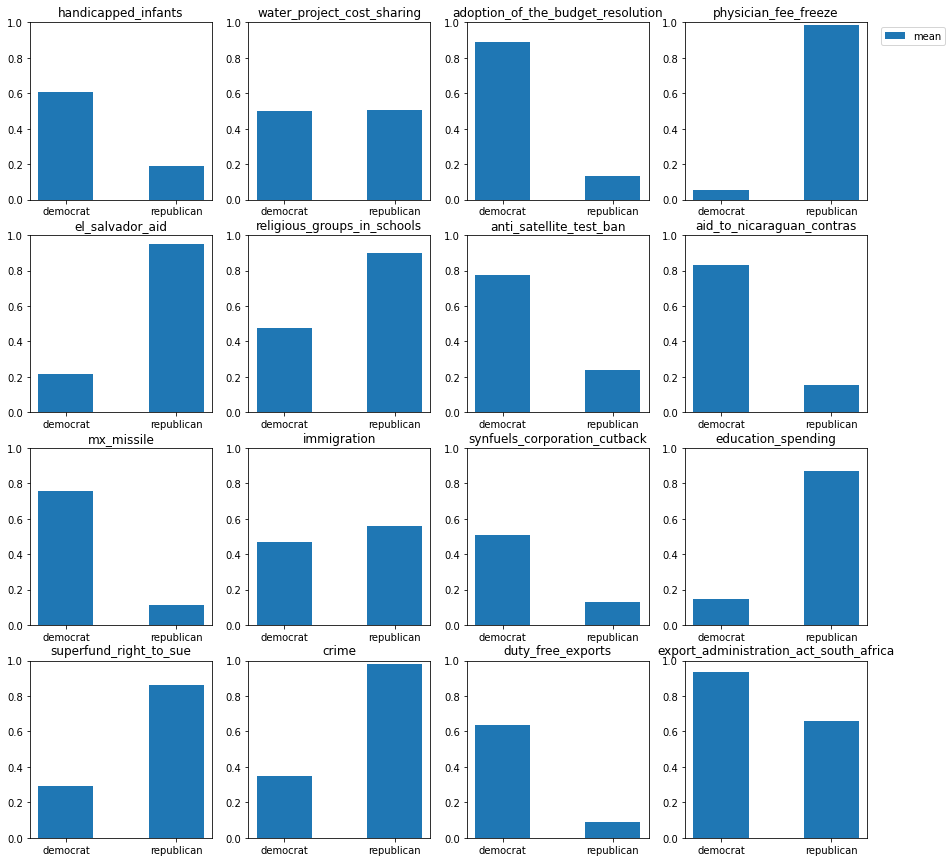

In [47]:
# Dla uproszczenia odczytu można ustalić dla 'y' wartość 1 i dla 'n' wartość 0. 
# Następnie policzyć średnią, która wychodzi dla demokratów i republikanów dla każdej z kategorii. 
column_names = congressional_voting_df.columns.to_list()
columns = 4
rows = 4
labels = ["democrat", "republican"]
fig, ax_array = plt.subplots(rows, columns,squeeze=False, figsize=(15,15))
x = np.arange(2)
width = 0.5

for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        
        column = column_names[4*i+j]
        df = congressional_voting_df.groupby(["political_party", column]).size().reset_index(name="num")
        df = df.pivot(columns=column, index="political_party", values="num")
        df["mean"] = df["y"]/(df["y"]+df["n"])
        df = df.drop(['?', 'n', 'y'], axis=1)
        
        axes.bar(x, df["mean"], align='center', width=width, label = "mean")
        axes.set_xticks(x)
        axes.set_xticklabels(labels)
        axes.set_title(column)
        axes.set_ylim(0,1)
        
        if i == 0 and j == 3:
            axes.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
            
plt.show()

# Na wykresach widać ogólne preferencje dotyczące głosowania każdej z partii. 
# Dla kategorii takich jak 'physician_fee_freeze', 'el_salvador_aid', 'aid_to_nicaraguan_contras' jest widać 
# zdecydowaną różnicę w poparciu obu partii. Te zmienne dobrze będą się sprawdzać przy przewidywaniu po głosach, 
# do której partii należy kongresman. Takich kategorii jest więcej, przy czym niektóre są lepsze, a niektóre gorsze. 

# W kategoriach 'water_project_cost_sharing' i 'immigration' głosy obu partii rokładają się po równo. 